# Box Regression - 3. Results Analysis

### Table of Contents

* [Results](#analysis)
    * [Librairies](#import)
    * [Parameters](#parameters)
    * [Training Measures](#measures)
        * [Loading Data](#dataframe)
        * [Final Accuracy](#accuracy)
        * [Validation Curves](#validation)
        * [Training Times](#time)

## Results   <a class="anchor" id="analysis"></a>

### Librairies   <a class="anchor" id="import"></a>

In [16]:
from IPython.display import display_html 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os
import re

### Parameters   <a class="anchor" id="parameters"></a>

In [17]:
PATH = "D:/Aurelien/Documents/Aurelien/University/Master 1 (2021-2022)/MA1 - Q2/Projets/Box Regression"
os.chdir(PATH)

### Training Measures    <a class="anchor" id="measures"></a>

#### Loading Data   <a class="anchor" id="dataframe"></a>

Create a big DataFrame with all the logs about the training from folder results

In [18]:
BATCH_LIST = [4096, 1024, 256, 64, 16, 4]
data = pd.DataFrame()
for folder in os.walk('results'):
    for file in folder[2]:
        if file[-4:] == ".log":
            *_, lr, _, batch, _, it, _ = re.split("_|-|\.", file)
            df = pd.read_csv(PATH + '/results/' + file)
            df_train = pd.DataFrame(df, columns=['epoch', 'loss'])
            df_train['valid'] = False
            df_val = pd.DataFrame(df, columns=['epoch', 'val_loss'])
            df_val.rename(columns = {'val_loss':'loss'}, inplace=True)
            df_val['valid'] = True
            df = pd.concat([df_train, df_val], axis=0)
            if int(batch) in BATCH_LIST:
                if (df['loss']<0).any() or (df['loss']>1).any():
                    print(f"Ignore invalid data {file} : loss must be comprised between [0, 1]", file=sys.stderr)
                else:
                    df['lr'] = float('0.'+lr)
                    df['batch'] = int(batch)
                    df['it'] = int(it)
                    data = pd.concat([data, df], axis=0)
data = data.reset_index(drop=True)
data

Ignore invalid data lr_0.0001-batch_1024-it_8.log : loss must be comprised between [0, 1]
Ignore invalid data lr_0.0001-batch_4096-it_7.log : loss must be comprised between [0, 1]
Ignore invalid data lr_0.001-batch_1024-it_9.log : loss must be comprised between [0, 1]
Ignore invalid data lr_0.001-batch_16-it_8.log : loss must be comprised between [0, 1]
Ignore invalid data lr_0.001-batch_4096-it_6.log : loss must be comprised between [0, 1]
Ignore invalid data lr_0.01-batch_4096-it_8.log : loss must be comprised between [0, 1]


,epoch,loss,valid,lr,batch,it
0,0,0.777903,False,0.0001,1024,0
1,1,0.776164,False,0.0001,1024,0
2,2,0.774406,False,0.0001,1024,0
3,3,0.772622,False,0.0001,1024,0
4,4,0.770808,False,0.0001,1024,0
...,...,...,...,...,...,...
11991,25,0.049156,True,0.1000,64,9
11992,26,0.048726,True,0.1000,64,9
11993,27,0.048447,True,0.1000,64,9
11994,28,0.048646,True,0.1000,64,9


#### Final Accuracy  <a class="anchor" id="accuracy"></a>

Tables from the final losses after 30 epochs

*NB: Learning curves with an early stop are not considered*

In [19]:
train = data[data['valid']==False]
valid = data[data['valid']==True]
columns = ["loss","batch","lr"]


df1 = train[train['epoch']==29][columns].groupby(["batch","lr"]).mean()
df2 = valid[valid['epoch']==29][columns].groupby(["batch","lr"]).mean()
dif = pd.DataFrame(100 * df1.loss / df2.loss)

df1.rename(columns={'loss': 'train loss'}, inplace=True)
df2.rename(columns={'loss': 'valid loss'}, inplace=True)
dif.rename(columns={'loss': 'similitude'}, inplace=True)

In [20]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Training Curves')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Validation Curves')
dif_styler = dif.style.set_table_attributes("style='display:inline'").set_caption('Similitude')

space = 5 * "\xa0"
display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_() + space + dif_styler._repr_html_(), raw=True)

Training Curves 
 
 
   
   
 train loss 
 
 
 batch 
 lr 
   
 
 
 
 
 4 
 0.0001 
 0.166290 
 
 
 0.001 
 0.076296 
 
 
 0.01 
 0.048530 
 
 
 16 
 0.0001 
 0.233798 
 
 
 0.001 
 0.125542 
 
 
 0.01 
 0.060065 
 
 
 0.1 
 0.036349 
 
 
 64 
 0.0001 
 0.354742 
 
 
 0.001 
 0.181704 
 
 
 0.01 
 0.106987 
 
 
 0.1 
 0.054588 
 
 
 256 
 0.0001 
 0.608280 
 
 
 0.001 
 0.258224 
 
 
 0.01 
 0.174654 
 
 
 1024 
 0.0001 
 0.743774 
 
 
 0.001 
 0.463807 
 
 
 0.01 
 0.239661 
 
 
 4096 
 0.0001 
 0.794044 
 
 
 0.001 
 0.583059 
 
 
 0.01 
 0.293586 
 
 
 0.1 
 0.258153 
 
 
 
     
 
 Validation Curves 
 
 
   
   
 valid loss 
 
 
 batch 
 lr 
   
 
 
 
 
 4 
 0.0001 
 0.165973 
 
 
 0.001 
 0.079723 
 
 
 0.01 
 0.054255 
 
 
 16 
 0.0001 
 0.231780 
 
 
 0.001 
 0.126675 
 
 
 0.01 
 0.061508 
 
 
 0.1 
 0.037583 
 
 
 64 
 0.0001 
 0.348920 
 
 
 0.001 
 0.180731 
 
 
 0.01 
 0.105992 
 
 
 0.1 
 0.054651 
 
 
 256 
 0.0001 
 0.601600 
 
 
 0.001 
 0.255394 
 
 
 0.01 
 0.173817 
 
 
 1024 
 0.0001 
 0.741449 
 
 
 0.001 
 0.458969 
 
 
 0.01 
 0.236623 
 
 
 4096 
 0.0001 
 0.793787 
 
 
 0.001 
 0.577436 
 
 
 0.01 
 0.292560 
 
 
 0.1 
 0.258545 
 
 
 
     
 
 Similitude 
 
 
   
   
 similitude 
 
 
 batch 
 lr 
   
 
 
 
 
 4 
 0.0001 
 100.190878 
 
 
 0.001 
 95.700459 
 
 
 0.01 
 89.447357 
 
 
 16 
 0.0001 
 100.870977 
 
 
 0.001 
 99.105699 
 
 
 0.01 
 97.653473 
 
 
 0.1 
 96.715316 
 
 
 64 
 0.0001 
 101.668507 
 
 
 0.001 
 100.538254 
 
 
 0.01 
 100.938109 
 
 
 0.1 
 99.883565 
 
 
 256 
 0.0001 
 101.110271 
 
 
 0.001 
 101.108387 
 
 
 0.01 
 100.481289 
 
 
 1024 
 0.0001 
 100.313635 
 
 
 0.001 
 101.054074 
 
 
 0.01 
 101.284211 
 
 
 4096 
 0.0001 
 100.032380 
 
 
 0.001 
 100.973717 
 
 
 0.01 
 100.350532 
 
 
 0.1 
 99.848392

> The model seems **not overfitting** the training data since the validation and training loss are very similar at the final epoch (>95%)
>
> *Something Interesting to note is that a small batch and big learning rate favorise the overfitting (e.g. batch=4, lr=0.1  gives only 89%)*

*Source for the special display :* https://softhints.com/display-two-pandas-dataframes-side-by-side-jupyter-notebook/

#### Validation Curves  <a class="anchor" id="validation"></a>

Filter the validation data into a new table

In [29]:
d = data[data['valid']==True]
d

,epoch,loss,valid,lr,batch,it
30,0,0.773231,True,0.0001,1024,0
31,1,0.771450,True,0.0001,1024,0
32,2,0.769652,True,0.0001,1024,0
33,3,0.767813,True,0.0001,1024,0
34,4,0.765956,True,0.0001,1024,0
...,...,...,...,...,...,...
11991,25,0.049156,True,0.1000,64,9
11992,26,0.048726,True,0.1000,64,9
11993,27,0.048447,True,0.1000,64,9
11994,28,0.048646,True,0.1000,64,9


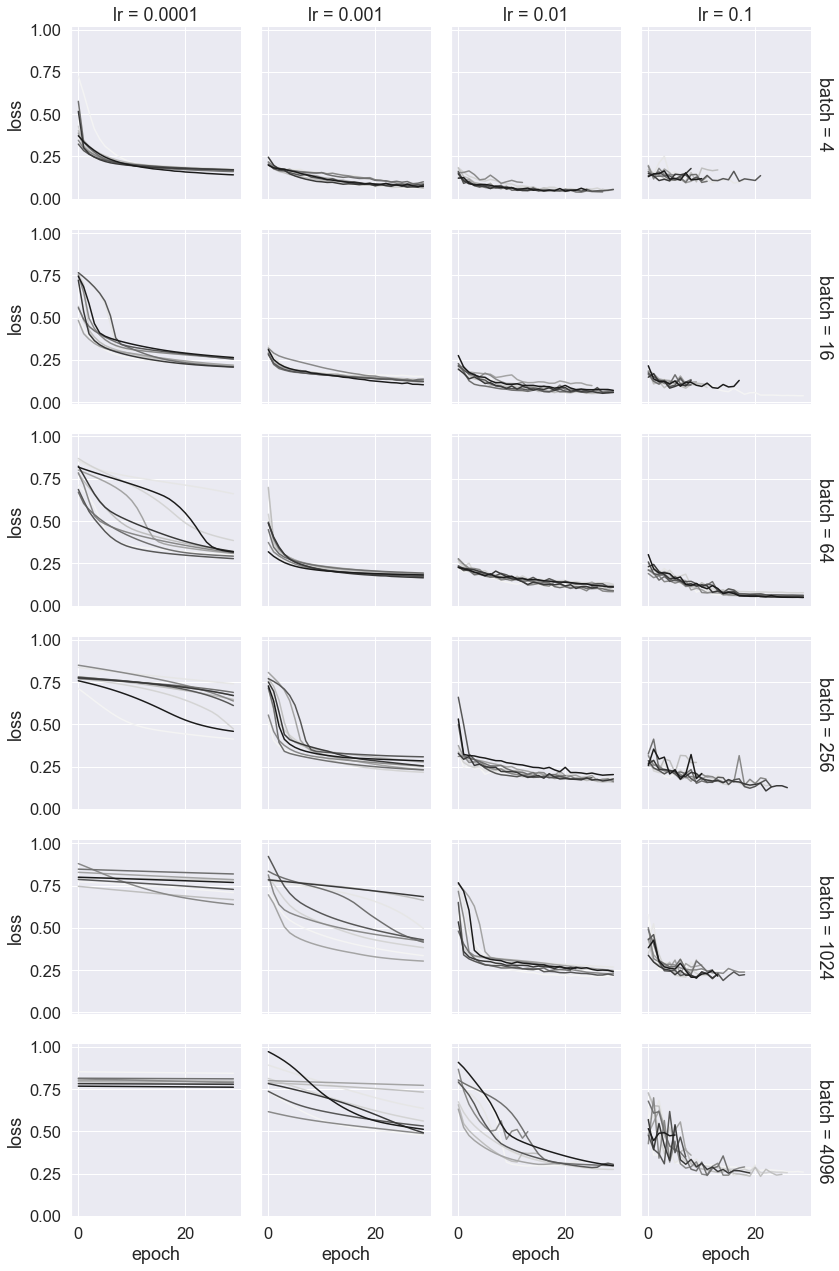

In [30]:
palette = sns.color_palette("Greys", 10)
sns.set(font_scale=1.5)
sea = sns.FacetGrid(data[data['valid']==True], row="batch", col = "lr", hue="it",  margin_titles=True, palette=palette)
sea.map(sns.lineplot, "epoch", "loss")
plt.savefig('./pictures/Impacts_of_lr_and_batch_on_losses.png')

> **Some interesting things to remarks :**
> - Learning rate speed up the learning
>    - too small : nearly flat curves (weights are barely not updated)
>    - too high : oscillations (miss the optimal point, causing back and forth)
> - Batch size put a boundary to the accuracy (low batch size increase maximal accuracy
> - There is a relation between batch size and learning rate. If we increase or decrease one, we need to do the same for the other one to keep similar curves
> - Big batch size are more sensitive to the learning rate. A small change of learning rate for a big batch size can considerably change learning curves.

#### Training Times  <a class="anchor" id="time"></a>

Load de data from the learning time file and plot it

In [32]:
with open("results/.timing.txt", 'r') as f:
    file = f.readlines()

table = []
for ligne in file:
    _, it, _, lr, _, batch, *_, time, _ = re.split('\s', ligne)
    table.append([int(it), float(lr), int(batch), float(time), float(time)*(4096/int(batch))])
    
duration = pd.DataFrame(columns=["Iteration", "Learning rate", "Batch size", "Time by epoch", "Time"], data=table)
duration["Logarithmic time"] = np.log(duration["Time"])

In [33]:
columns = ["Learning rate", "Batch size", "Time by epoch", "Time", "Logarithmic time"]
duration[columns].groupby(["Batch size","Learning rate"]).mean()

Time by epoch          Time  Logarithmic time
Batch size Learning rate                                               
4          0.0001             26.732000  27373.568000         10.122607
           0.0010             25.202000  25806.848000         10.058814
           0.0100             25.331000  25938.944000         10.055778
           0.1000             25.667000  26283.008000         10.058632
8          0.0001             14.369000   7356.928000          8.818728
           0.0010             13.532000   6928.384000          8.766834
           0.0100             12.995000   6653.440000          8.732239
           0.1000             15.773000   8075.776000          8.869637
16         0.0001              7.861000   2012.416000          7.540374
           0.0010              6.977000   1786.112000          7.450794
           0.0100              6.843000   1751.808000          7.433066
           0.1000              9.184545   2351.243636          7.678133
32         0.0001              5.828000    745.984000          6.557115
           0.0010              5.207000    666.496000          6.468974
           0.0100              5.080000    650.240000          6.446771
           0.1000              6.425455    822.458182          6.645246
64         0.0001              4.580000    293.120000          5.639341
           0.0010              5.251000    336.064000          5.689516
           0.0100              4.170000    266.880000          5.557836
           0.1000              5.400000    345.600000          5.794616
128        0.0001              4.054000    129.728000          4.828924
           0.0010              3.892000    124.544000          4.786312
           0.0100              3.855000    123.360000          4.783876
           0.1000              4.817273    154.152727          4.956586
256        0.0001              3.843000     61.488000          4.093525
           0.0010              5.904000     94.464000          4.233702
           0.0100              4.116000     65.856000          4.131987
           0.1000              4.853636     77.658182          4.271925
512        0.0001              3.642000     29.136000          3.346394
           0.0010              3.595000     28.760000          3.334385
           0.0100              3.864000     30.912000          3.390383
           0.1000              5.510000     44.080000          3.621144
1024       0.0001              4.529000     18.116000          2.764070
           0.0010              4.174000     16.696000          2.730151
           0.0100              4.134000     16.536000          2.755583
           0.1000              4.955455     19.821818          2.914058
2048       0.0001              3.968000      7.936000          2.037778
           0.0010              3.774000      7.548000          1.998382
           0.0100              4.343000      8.686000          2.107895
           0.1000              4.660909      9.321818          2.193454
4096       0.0001              4.367000      4.367000          1.363962
           0.0010              3.539000      3.539000          1.237857
           0.0100              3.661000      3.661000          1.270799
           0.1000              5.580000      5.580000          1.581627

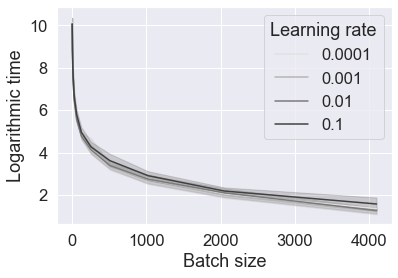

In [34]:
palette = sns.color_palette("Greys", 4)
sns.lineplot(x="Batch size", y="Logarithmic time", hue="Learning rate", data=duration, palette=palette)
plt.savefig('./pictures/Training_time_from_batch_size.png')

> Training time is inversly exponentially proportionnal to the batch size.
> 
> **Trade-off between cost and performance** since big batch deteriorate accuracy but improve training time.